**Task:** Data analysis of a Titanic dataset with Pandas ()

**Deadline:** due 23:59 22.09.2017

Please add your surname to the name of this ipynb file

Download Titanic dataset

Load data to pandas dataframe

# Bulat Gabdrakhmanov

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
%precision 6

Populating the interactive namespace from numpy and matplotlib


'%.6f'

In [3]:
df = pd.read_excel('Data/titanic.xls')
df = df.fillna(df.mean())

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"


# Please, answer the following questions with code and output or visualizations below each question.

### What  is  the  passenger  sex  distribution? 

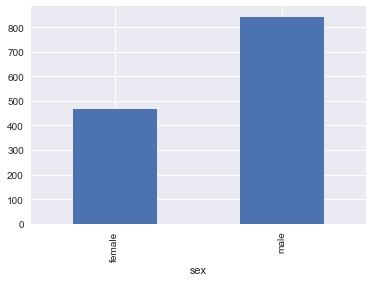

In [5]:
df.groupby('sex').count()['name'].plot.bar()

### What  is  the  passenger  service  class  distribution? 

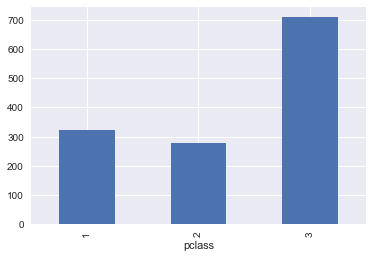

In [6]:
df.groupby('pclass').count()['name'].plot.bar()

### How  does  the  mean  male  age  change  in  dependence  on  service  class? 

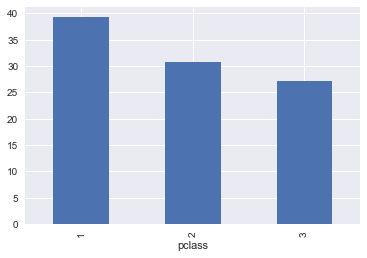

In [7]:
df[df['sex'] == 'male'].groupby('pclass').agg('mean')['age'].plot.bar()

### How  does  the  mean  female  age  change  in  dependence  on  service  class? 

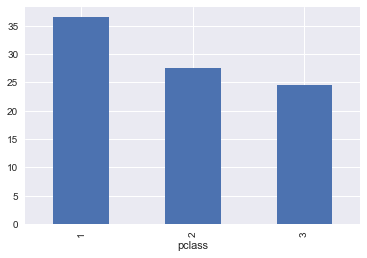

In [8]:
df[df['sex'] == 'female'].groupby('pclass').agg('mean')['age'].plot.bar()

### What  is  the  proportion  of  survived  passengers?

In [9]:
(df[df['survived'] == 1].count()['name'] / df.count()['name'])

0.381971

### Is  it  true,  that  younger  passengers  survived  more  frequently  than  older passengers?

In [10]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col)
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

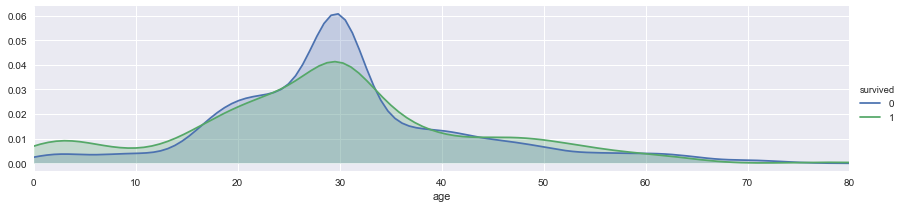

In [11]:
plot_distribution( df , var = 'age' , target = 'survived')

- Passengers from 0 to 16 survived more frequently.
- For the ages from 16 to 34 we can see an opposite situation, with equal amount of survived/died people at the age of ~24-25.
- From 34 to 39 again people have a better survival rate.
- Ages 39-43 were less succesful and died more compared to the ages 44-59
- For the ages 60 and higher a graph representing died people slightly overcomes survived. 


__So, younger passengers between the ages 0 to 16 survived more frequently than the older ones.__


### Is  it  true,  that  women  survived  more  frequently? 

In [12]:
women = df[(df['sex'] == 'female') & df['survived'] == 1].count()['name']

In [13]:
men = df[(df['sex'] == 'male') & df['survived'] == 1].count()['name']

In [14]:
print('Survived women: ', women)
print('Survived men: ', men)
print(women > men)

Survived women:  339
Survived men:  161
True


### What  is  the  mean  of  the  fare?  What  is  the  variance  of  the  fare? 

In [15]:
df.mean()['fare']

33.295479

In [16]:
df.var()['fare']

2676.911604

### Is  it  true,  that  passengers  with  more  expensive  tickets  survived  more frequently?

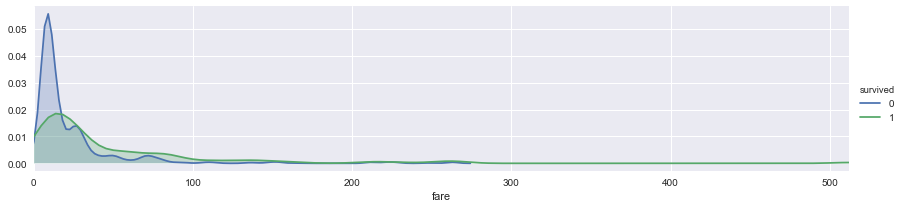

In [17]:
plot_distribution( df , var = 'fare' , target = 'survived')

__Yes__. We can see that the blue graph(died people) for a fare less than 50 is much higher compared to the green graph(survivors) for the same fare. As far as the fare increases the green graph overcomes the blue one __which means more expensive tickets results in a more frequent survival__

### What  is  most  popular  male  name  on  the  ship? 

In [23]:
male_full_names = df[df['sex'] == 'male'].copy()
male_names = male_full_names['name'].map( lambda name: name.split()[2])


In [52]:
names_df = male_names.groupby(male_names).count().rename('count').reset_index()
name = names_df.loc[names_df['count'] == names_df['count'].max(), 'name'].iloc[0]
occurence = names_df['count'].max()

In [54]:
print('Name: ', name, '\nNumber of occurences: ', occurence)

Name:  William 
Number of occurences:  50
